참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import sympy.plotting as splot
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

## 예제 05.007

### 문제에서 주어진 변수

#### 단면

W200$\times$100

In [2]:
b_m, h_m, t_f_m, t_w_m, I_m4 = sy.symbols('b_m, h_m, t_f_m, t_w_m, I_m4', positive=True)

s_d = {
    b_m: 210e-3,
    h_m: 229e-3,
    t_f_m: 23.7e-3,
    t_w_m: 14.5e-3,
    I_m4: 113e6 * (1e-3**4),
}

#### 하중

In [3]:
V_N = sy.Symbol('V_N')

s_d[V_N] = 80e3

### 전단응력

전단응력은 eq. 5.8 (p. 199) 과 같이 계산할 수 있다.

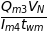

In [4]:
Q_m3 = sy.Symbol('Q_m3', positive=True)
tau_Pa = V_N * Q_m3 / (t_w_m * I_m4)
tau_Pa

In [5]:
tau_Pa.subs(s_d)

여기서 $Q$ 는 단면의 모멘트이다.

### (1) 웨브 web 에서의 최소 전단응력

중립면으로부터 멀어질 수록 전단력은 작아질 것이다. 웨브와 플랜지 flange 가 만나는 점에서 웨브의 전단응력은 최소일 것이다.

In [6]:
y_min_m = h_m / 2 - t_f_m

최소 전단응력을 위한 $Q_{min}$ 는 플랜지 부분만 감안한다.

플랜지 면적

In [7]:
A_f_m2 = b_m * t_f_m

플랜지의 도심 거리

In [8]:
y_bar_min_m = h_m/2 - (t_f_m/2)

$Q_{min}$

In [9]:
Q_min_m3 = A_f_m2 * y_bar_min_m
Q_min_m3

값을 확인해 본다.

In [10]:
Q_min_m3.subs(s_d)

$mm^3$ 단위로도 확인해본다.

In [11]:
Q_min_m3.subs(s_d)*(1e3**3)

응력 식의 $Q$에 $Q_{min}$을 대입하면 웨브의 최소 전단응력은 다음과 같다.

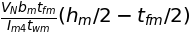

In [12]:
tau_min_Pa = tau_Pa.subs({Q_m3: Q_min_m3})
tau_min_Pa

값을 확인한다.

In [13]:
tau_min_Pa.subs(s_d)

$MPa$ 단위 값을 확인한다.

In [14]:
tau_min_Pa.subs(s_d)*1e-6

### (2) 웨브에서의 최대 전단응력

중립면에서 최대가 될 것이다.

In [15]:
y_max_m = 0

최대 전단응력을 위한 $Q_{max}$ 는 플랜지 부분과 웨브의 위쪽 절반을 감안한다.

웨브 위쪽 절반 면적은 다음과 같다.

In [16]:
A_w_half_m2 = t_w_m * (h_m/2 - t_f_m)
A_w_half_m2

웨브 위쪽 절반의 도심은 아래와 같을 것이다.

In [17]:
y_w_max_m = (h_m/2 - t_f_m) / 2
y_w_max_m

$Q_{max}$ 는 플랜지 부분의 $Q$ 와 웨브 위쪽 절반의 $Q$를 합한 것이다.

In [18]:
Q_max_m3 = A_w_half_m2 * y_w_max_m + A_f_m2 * y_bar_min_m
Q_max_m3

In [19]:
sy.simplify(Q_max_m3)

$Q$ 값을 확인한다.

In [20]:
Q_max_m3.subs(s_d)

최대 전단응력을 구한다.

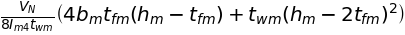

In [21]:
tau_max_Pa = sy.simplify(tau_Pa.subs(Q_m3, Q_max_m3))
tau_max_Pa

최대 전단응력 값을 확인한다.

In [22]:
tau_max_Pa.subs(s_d)

$MPa$ 단위로 최대 전단응력 값을 확인한다.

In [23]:
tau_max_Pa.subs(s_d) * 1e-6

### (3) 웨브가 감당하는 전단력의 백분률

웨브의 $y$ 를 따라 전단응력은 직사각형 위의 포물선 형태를 가진다.<br>Along the $y$ of web, shear stress is distributed in the form of a parabola on a rectangle.

선도를 그려서 적분하는 것도 가능하지만 이번에는 직사각형부와 포물선부의 면적을 따로 구해서 더해 본다.<br>Instead of integrating the plot, this time, we will calculate areas of rectangle and parabola separately and then add together.

#### 포물선의 면적을 밑변 $h$ 와 높이 $m$로 표시<br>Area of the parabola in terms of base $h$ and height $m$

In [24]:
h, m, a = sy.symbols('h, m, a', positive=True)
y_m = sy.symbols('y_m', real=True)

밑변 $h$, 높이 $m$ 인 포물선이 다음과 같다고 하자.<br>Let a parabola with base $h$ and height $m$ is as follows.

$$p(y)=m - a y^2 $$

위 포물선은 $y=0$ 에서 최대값 $m$ 이다.  $p(\pm \frac {h}{2})=0$으로 만드는 $a$ 를 다음과 같이 구한다.<br>This parabola has the maximum $m$ at $y=0$. Let's find $a$ such that $p(\pm \frac {h}{2})=0$

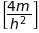

In [25]:
a_sol_list = sy.solve(m - (a * y_m**2).subs(y_m, h/2), a)
a_sol_list

In [26]:
a = a_sol_list[0]

따라서 적분값은 다음과 같을 것이다.<br>The integration of the parabola would be as follows.

In [27]:
a_para = sy.integrate(m - (a * y_m**2), (y_m, -h/2, h/2))
a_para

#### 웨브가 담당하는 전단력<br>Shear force by the web

$$
V_{web} = t_{web} \left[A_{para} + A_{rect} \right]
$$

$$
A_{para} = \frac{2}{3} h_{web} \cdot (\tau_{max}-\tau_{min})
$$

$$h_{web}=h - 2 t_{flange}$$

$$
A_{rect} = h_{web} \cdot \tau_{min}
$$

$$
\begin{align}
    V_{web} &= t_{web} \left[\frac{2}{3} h_{web} \cdot (\tau_{max}-\tau_{min}) + h_{web} \cdot \tau_{min} \right] \\
    & = t_{web} h_{web} \left[\frac{2}{3} (\tau_{max}-\tau_{min}) + \tau_{min} \right]
\end{align}
$$

web의 높이<br>height of the web

In [28]:
h_w_m = h_m - 2 * t_f_m

포물선 부분의 면적<br>Area of the parabola part of the $y$-vs-$\tau$ plot.

In [29]:
A_para_N_m = 2* h_w_m * (tau_max_Pa - tau_min_Pa)/3
sy.simplify(A_para_N_m)

직사각형 부분의 면적<br>Area of the rectangle part of the $y$-vs-$\tau$ plot.

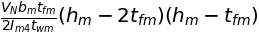

In [30]:
A_rect_N_m = h_w_m * tau_min_Pa
sy.simplify(A_rect_N_m)

위 두 면적의 합<br>Sum of the two areas above

In [31]:
V_w_N = t_w_m * (A_para_N_m + A_rect_N_m)
sy.simplify(V_w_N)

웨브 부분이 담당하는 전단력은 다음과 같다.<br>Shear force of the web part

In [32]:
V_w_N.subs(s_d)

전체 전단력 대비 백분율은 다음과 같다.<br>Percentage within the whole shear force

In [33]:
(V_w_N/V_N).subs(s_d) * 100

### 전단응력의 분포<br>Distribution of shear stress

`y` 좌표 배열 준비<br>`y` coordinate array

In [34]:
dy_m = 1e-3
dy_half_m = dy_m * 0.5
y_m_array = np.arange(s_d[h_m] * (-0.5), s_d[h_m] * (0.5) + dy_half_m, dy_m)

#### `y` 에 따른 폭<br>width with respect to `y`

중립면에서 `y` 만큼 떨어진 지점의 폭을 `y` 값의 절대값을 기준으로 계산.<br>Calculate width of the section at `y` away from the neutral axis using the absolute value of `y`.

In [35]:
b_piecewise_m = sy.Piecewise((b_m, abs(y_m) >= (h_m/2 - t_f_m)),
                             (t_w_m, abs(y_m) < (h_m/2 - t_f_m)))

위에서 정의된 폭.<br>The width defined above.

In [36]:
b_piecewise_m

⎧                  hₘ        
⎪ bₘ    for │yₘ│ ≥ ── - t_f_m
⎪                  2         
⎨                            
⎪                  hₘ        
⎪t_w_m  for │yₘ│ < ── - t_f_m
⎩                  2         

`sympy` 정의로 부터 `numpy` 배열을 입력 매개 변수로 받아들일 수 있는 함수를 만듦.<br>Make a function capable of taking a `numpy` array as input from a `sympy` definition.

In [37]:
b_func_m = sy.lambdify(y_m, b_piecewise_m.subs(s_d))

함수를 이용하여 폭의 배열을 계산함.<br>Using the function, calculate the array of width.

In [38]:
b_m_array = b_func_m(y_m_array)

폭을 `y` 에 대해 그림으로 표시.<br>Plot with with respect to `y`.

In [39]:
section_list = plt.plot(b_m_array * 0.5, y_m_array) \
             + plt.plot(b_m_array * -0.5, y_m_array)

In [40]:
flange_list = plt.plot(s_d[b_m] * 0.5 * np.ones_like(y_m_array), y_m_array, '--', label='flange', linewidth=0.5) \
            + plt.plot(s_d[b_m] * -0.5 * np.ones_like(y_m_array), y_m_array, '--', label='flange', linewidth=0.5)

In [41]:
web_list = plt.plot(s_d[t_w_m] * 0.5 * np.ones_like(y_m_array), y_m_array, '-.', label='web thickness', linewidth=0.5) \
         + plt.plot(s_d[t_w_m] * -0.5 * np.ones_like(y_m_array), y_m_array, '-.', label='web thickness', linewidth=0.5)

In [42]:
plt.legend(loc=0)
plt.xlabel('$b(m^2)$')
plt.axis('equal')

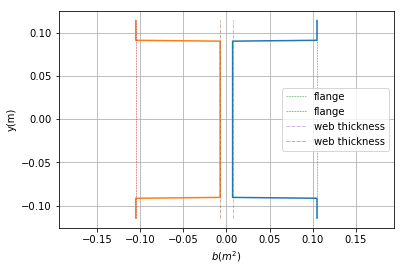

In [43]:
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

##### 단면 그림<br>Section drawing

웨브 부분 왼쪽 아래 지점 좌표와 치수<br>Lower left coordinates and dimensions of the web

In [44]:
web_width_m = t_w_m.subs(s_d)
web_height_m = (h_m - t_f_m * 2).subs(s_d)

x_m_web_low_left = web_width_m * -0.5
y_m_web_low_left = web_height_m * -0.5

플랜지 치수<br>Dimensions of the flanges

In [45]:
flange_width_m = b_m.subs(s_d)
flange_height_m = t_f_m.subs(s_d)

위 플랜지 왼쪽 아래 지점 좌표<br>Lower left coordinates of the upper flange

In [46]:
x_m_upper_flange_low_left = -flange_width_m * 0.5
y_m_upper_flange_low_left = web_height_m * 0.5

아래 플랜지 왼쪽 아래 지점 좌표<br>Lower left coordinates of the lower flange

In [47]:
x_m_lower_flange_low_left = -flange_width_m * 0.5
y_m_lower_flange_low_left = web_height_m * -0.5 - flange_height_m

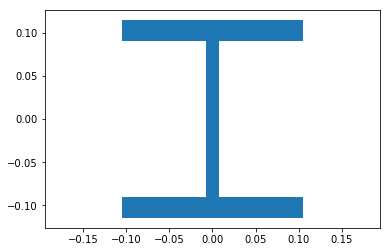

In [48]:
# Nick Charton, Drawing and Animating Shapes with Matplotlib, nickcharton.net, https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
plt.axes()
web_patch = plt.Rectangle((x_m_web_low_left, y_m_web_low_left), web_width_m, web_height_m)
upper_flange_patch = plt.Rectangle((x_m_upper_flange_low_left, y_m_upper_flange_low_left), flange_width_m, flange_height_m)
lower_flange_patch = plt.Rectangle((x_m_lower_flange_low_left, y_m_lower_flange_low_left), flange_width_m, flange_height_m)

plt.gca().add_patch(web_patch)
plt.gca().add_patch(upper_flange_patch)
plt.gca().add_patch(lower_flange_patch)

plt.axis('equal')
plt.show()
#plt.savefig('h_section.png', dpi=300)

plt.clf()


#### `y` 위의 면적<br>Area above `y`

Q 값을 계산하기 위해 중립면에서 `y` 만큼 떨어진 넓이를 계산.<br>To calculate Q, calculate area above `y` from the neutral axis. 

In [49]:
A_m2_piecewise = sy.Piecewise((b_m * (h_m/2 - abs(y_m)) , t_f_m >= (h_m/2 - abs(y_m))),
                              (b_m * t_f_m + t_w_m * (h_m/2 - abs(y_m) - t_f_m), t_f_m < (h_m/2 - abs(y_m))))

`sympy` 정의로 부터 `numpy` 배열을 입력 매개 변수로 받아들일 수 있는 함수를 만듦.<br>Make a function capable of taking a `numpy` array as input from a `sympy` definition.

In [50]:
A_m2_func = sy.lambdify(y_m, A_m2_piecewise.subs(s_d))

##### 함수 확인<br>Verify the function

`y==(h/2 - t_f)` 일 때 플랜지 면적과 같은가?

In [51]:
assert (1e-5 > abs(A_m2_func((h_m/2 - t_f_m).subs(s_d)) - (b_m * t_f_m).subs(s_d)))

`y`==0 일 때 면적의 절반과 같은가?

In [52]:
assert (1e-5 > abs(A_m2_func(0) - (b_m * t_f_m + (h_m/2 - t_f_m) * t_w_m ).subs(s_d)))

##### $y$ 에 따른 면적을 그래프로 표시함<br>Plot $y$ vs area

함수를 이용하여 면적의 배열을 계산함.<br>Using the function, calculate the array of area.

In [53]:
A_m2_func_array = A_m2_func(y_m_array)

`y` 와 그 위 면적을 그림으로 표시.<br>Plot `y` vs area above it.

In [54]:
plt.plot(A_m2_func_array, y_m_array)
plt.plot( ((t_f_m * b_m).subs(s_d))* np.ones_like(y_m_array), y_m_array, label='flange area')
plt.legend(loc=0)
plt.xlabel('$A(m^2)$')

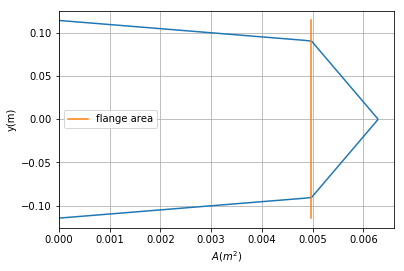

In [55]:
plt.xlim(xmin=0)
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

#### `y` 위의 면적의 도심<br>The centroid of area above `y`

역시 Q 값을 계산하기 위해 중립면으로부터 `y` 위의 면적의 도심의 위치를 계산.<br>Again to calculate Q, calculate the centroid of area above `y` from the neutral axis. 

##### `y`가 웨브 범위 안 일 때 그 위 면적의 도심<br>The centroid of area above `y` when `y` is within the web

웨브 가장 위의 `y`의 최대값<br>Maximum of `y` at the top of the web

In [56]:
y_top_web_m = h_m/2 - t_f_m

`y` 위의 웨브 부 면적의 도심<br>Centroid of web area above `y`

In [57]:
y_bar_web_m = (y_top_web_m + abs(y_m)) / 2

`y` 위의 웨브 부 면적<br>Web area above `y`

In [58]:
A_web_y_m2 = t_w_m * (y_top_web_m - abs(y_m))

`y`가 웨브 범위 안 일 때 `y` 위의 전체 면적<br>Area above `y` when `y` is within web.

In [59]:
A_y_m2 = b_m * t_f_m + t_w_m * (h_m/2 - abs(y_m) - t_f_m)

`y`가 웨브 범위 안 일 때 `y` 위의 전체 면적의 도심<br>Centroid of area above `y` when `y` is within web.

In [60]:
y_bar_m = (b_m * t_f_m * (h_m/2 - t_f_m / 2) + A_web_y_m2 * y_bar_web_m) / A_y_m2

`y` 위의 면적의 도심의 위치<br>Centroid of the area above `y`

In [61]:
y_bar_m_piecewise = sy.simplify(
    sy.Piecewise(
        (h_m/2 - (h_m/2 - abs(y_m)) / 2, t_f_m >= (h_m/2 - abs(y_m))),
        (y_bar_m, t_f_m < (h_m/2 - abs(y_m)))
    )
)

In [62]:
y_bar_m_piecewise

⎧                                  hₘ   │yₘ│                                  
⎪                                  ── + ────                                  
⎪                                  4     2                                    
⎪                                                                             
⎨                        t_w_m⋅(-hₘ + 2⋅t_f_m + 2⋅│yₘ│)⋅(hₘ - 2⋅t_f_m + 2⋅│yₘ│
⎪bₘ⋅t_f_m⋅(hₘ - t_f_m) - ─────────────────────────────────────────────────────
⎪                                                  4                          
⎪─────────────────────────────────────────────────────────────────────────────
⎩                 2⋅bₘ⋅t_f_m - t_w_m⋅(-hₘ + 2⋅t_f_m + 2⋅│yₘ│)                 

               hₘ       
   for t_f_m ≥ ── - │yₘ│
               2        
                        
)                       
─                       
               hₘ       
─  for t_f_m < ── - │yₘ│
               2        

`sympy` 정의로 부터 `numpy` 배열을 입력 매개 변수로 받아들일 수 있는 함수를 만듦.<br>Make a function capable of taking a `numpy` array as input from a `sympy` definition.

In [63]:
y_bar_m_func = sy.lambdify(y_m, y_bar_m_piecewise.subs(s_d))

##### 함수 확인<br>Verify the function

$y=(\frac{h}{2} - t_f)$ 일 때 $\overline{y}$는 플랜지 절반 위치와 같은가?<br>
When $y=(\frac{h}{2} - t_f)$, is $\overline{y}$ the same as the half of the flange thickness?

In [64]:
assert (1e-5 > abs(y_bar_m_func(y_top_web_m.subs(s_d)) - 0.5*(y_top_web_m + h_m/2).subs(s_d)))

##### $y$와 $y$ 위 면적의 도심의 위치 $\overline{y}$ 를 그림으로 표시.<br>Plot $y$ vs $\overline{y}$, centroid of area above $y$.

함수를 이용하여 도심의 배열을 계산함.<br>Using the function, calculate the array of centroid.

In [65]:
y_bar_m_func_array = y_bar_m_func(y_m_array)

$y$와 $y$ 위 면적의 도심의 위치 $\overline{y}$ 를 그림으로 표시.<br>Plot $y$ vs $\overline{y}$, centroid of area above $y$.

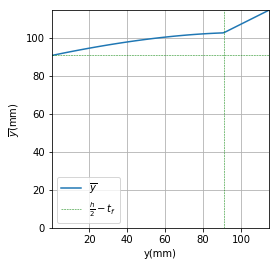

In [66]:
plt.clf()

# y의 범위는 중립면 위
# The range of y is above the neutral plane
y_mm_array_half = y_m_array[y_m_array>=0] * 1e3
y_bar_mm_func_array_half = y_bar_m_func_array[y_m_array>=0] * 1e3

# y 에 대한 y_bar 그래프를 그림
# plot y vs y_bar
plt.plot(y_mm_array_half, y_bar_mm_func_array_half, label='$\overline{y}$')
xlims = (y_mm_array_half.min(), y_mm_array_half.max())
ylims = np.array((0, y_mm_array_half.max()), dtype=float)
# 플랜지 두께를 표시함
# Indicate flange thickness
plt.plot(y_top_web_m.subs(s_d) * 1e3 * np.ones_like(xlims), ylims, 'g--', linewidth=0.5, label='$\\frac{h}{2}-t_f$')
plt.plot(xlims, y_top_web_m.subs(s_d) * 1e3 * np.ones_like(ylims), 'g--', linewidth=0.5)
plt.ylabel('$\overline{y}$(mm)')
plt.xlabel('y(mm)')
# 범례를 추가함
# Add legend
plt.legend(loc=0)
plt.axis('scaled')
plt.xlim(xlims)
plt.ylim(ylims)
plt.grid(True)
plt.show()

Q 값을 계산<br>Calculate Q

In [67]:
Q_m3_array = (A_m2_func_array * y_bar_m_func_array)

In [68]:
plt.plot(Q_m3_array, y_m_array)
plt.xlabel('$Q(m^3)$')

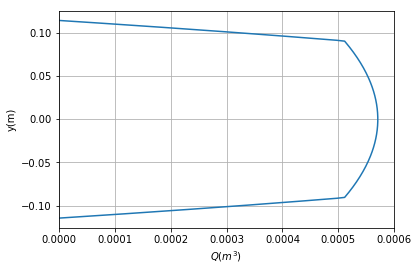

In [69]:
plt.xlim(xmin=0)
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

#### 전단응력 분포<br>Distribution of the shear stress

$$
\tau=\frac{VQ}{IB}
$$

In [70]:
tau_Pa_array = (s_d[V_N]) * Q_m3_array / (float((I_m4.subs(s_d)))* b_m_array)

In [71]:
plt.clf()
plt.plot(tau_Pa_array*1e-6, y_m_array, label='$\\tau(y)$')
plt.plot(tau_min_Pa.subs(s_d)*1e-6*np.ones_like(y_m_array), y_m_array, label='$\\tau_{web min}$')
plt.plot(tau_max_Pa.subs(s_d)*1e-6*np.ones_like(y_m_array), y_m_array, label='$\\tau_{web max}$')
plt.legend(loc=0)
plt.xlabel('$\\tau$(MPa)')

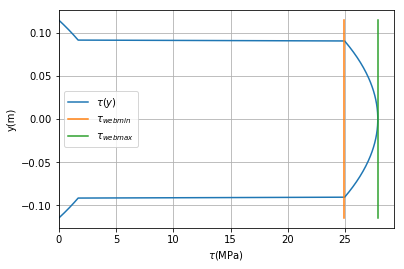

In [72]:
plt.xlim(xmin=0)
plt.ylabel('y(m)')
plt.grid(True)
plt.show()
# plt.savefig('ex05.007.tau.svg')

최대응력값을 확인<br>Check the maximum stress

In [73]:
assert (1e-5 > ((abs(max(tau_Pa_array) - tau_max_Pa.subs(s_d))) / tau_max_Pa.subs(s_d)))